In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import sys
import shutil
import os
from enum import Enum

In [5]:
#download files to subdirectory, for next cases, download/load in directly from my user instead of viveks
#not needed to call this function anymore, that it why commented out!!



# source_files = [
#     '/home/vivek/NOBINFBACKUP/projects/mGast_tchic/adata_files/allsamples_genelevel_RNAandChIC_counts.filt-norm.loom',
#     '/home/vivek/NOBINFBACKUP/projects/mGast_tchic/adata_files/allsamples_promoterlevel_K4me3_counts.loom',
#     '/home/vivek/NOBINFBACKUP/projects/mGast_tchic/adata_files/allsamples_genelevel_RNAandChIC_counts.loom'
# ]
# dest_dir = '../celloracle_data'
# os.makedirs(dest_dir, exist_ok=True)
# dest_names= [
#     dest_dir+'/filtered_and_normalized.h5ad',
#     dest_dir+'/promoter_k4me3_counts.h5ad',
#     dest_dir+'/raw_counts_for_pearson_filter.h5ad'
# ]
# #move files to desired dir
# for source,dest in zip(source_files, dest_names):
#     adata = sc.read_loom(source)
#     adata.write_h5ad(dest)


In [13]:
#instal modified cellOracle code into this env
#not necessary to run anymore except when modifying more
#what to do then:
#step 1: clone again from github using the jupyter terminal in this server
#step 2: run this command again, if necessary, adjust the setup.py with the correct name (prob necessary)
# !pip install -e ../CellOracle




Obtaining file:///home/caspar/CellOracle
  Preparing metadata (setup.py) ... done
  Attempting uninstall: anndata
    Found existing installation: anndata 0.10.9
    Uninstalling anndata-0.10.9:
      Successfully uninstalled anndata-0.10.9
  DEPRECATION: Legacy editable install of modified_celloracle==0.19.0 from file:///home/caspar/CellOracle (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for modified_celloracle


In [2]:
#global helper objects
class DataType(Enum):
    
    FILTERED_AND_NORMALIZED =('filtered_and_normalized.h5ad', 'filtered_and_normalized', 'og_files' )
    PROMOTER_K4ME3_COUNTS = ('promoter_k4me3_counts.h5ad', 'promoter_k4me3_counts', 'og_files')
    RAW_COUNTS_FOR_PEARSON_FILTER = ('raw_counts_for_pearson_filter.h5ad', 'raw_counts_for_pearson_filter' , 'og_files')
    RAW_COUNTS_FOR_PEARSON_FILTER_SUBSET = ('raw_counts_for_pearson_filter_subset_from_normalized_set.h5ad', 'raw_counts_for_pearson_filter_subset_from_normalized_set','preprocessed_files_before_pearson_filter')
    
    def __new__(cls, filename:str, name:str, dir:str):
        obj = object.__new__(cls)
        path = os.path.join("../../../celloracle_data", dir, filename)
        obj._value_ = path
        obj.path = path
        obj.desc = name
        return obj
    

In [3]:


class HelperFuncs:

    @staticmethod
    def get_ann_data(data_enum: DataType) -> sc.AnnData:      
        """"Call this function publicly first for optimal functionality
        load in the data using the data enum"""
        if not os.path.exists(data_enum.path):
            print(data_enum.path)
            print('File does not exist')
            return None
        
        return sc.read_h5ad(data_enum.path)
    
    
    @staticmethod
    def print_info_about_anndata_frame(adata:sc.AnnData):
        """Print information about anndata frame"""
        print("Main matrix (.X):")
        print(adata)
        print(f"Type: {type(adata.X)}")
        print(f"Shape: {adata.X.shape}")
        print(f"Data type: {adata.X.dtype}")
        print("\nAvailable layers:")
        print(list(adata.layers.keys()))
        print("\nSize comparison:")
        print(f"Main matrix (.X) shape: {adata.X.shape}")
        for layer_name, layer in adata.layers.items():
            print(f"Layer '{layer_name}' shape: {layer.shape}")
    
    @staticmethod
    def write_anndata_to_file(adata:sc.AnnData, file_name:str):
        """Write anndata to file"""
        #check if file_name ends with .h5ad
        if not (file_name.endswith('.h5ad') or not file_name.endswith('.h5')):
            print("File name should end with .h5ad")
            file_name = file_name + '.h5ad'
        path = os.path.join(DATA_DIR, file_name)
        adata.write_h5ad(path)
        print(f"Anndata written to {path}")

    @staticmethod
    def reset_global_data():
        """Reset global data"""
        RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_OG.copy()
        NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.copy()
        print("Global data reset")
        
    @staticmethod
    def declare_necessary_global_vars():
        """Assign global vars"""
        global RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_OG
        global RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE
        global NORM_COUNT_FOR_PEARSON_FILTER_SUBSET
        global NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE
        global DATA_DIR 
        global OG_Files_Data_Dir
        global Base_GRN_Files
        global Base_GRN
        global Preproccesed_Data
        DATA_DIR =  '../../../celloracle_data'
        OG_Files_Data_Dir = os.path.join(DATA_DIR, 'og_files')
        Base_GRN_Files = os.path.join(DATA_DIR, 'necessary_base_grn_files')
        Base_GRN = os.path.join(DATA_DIR, 'base_grn')
        Preproccesed_Data = os.path.join(DATA_DIR, 'preprocessed_files_before_pearson_filter')
        print(os.path.exists(DATA_DIR))
        print(os.path)
        RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_OG = HelperFuncs.get_ann_data(DataType.RAW_COUNTS_FOR_PEARSON_FILTER)
        #RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_OG.copy()
        NORM_COUNT_FOR_PEARSON_FILTER_SUBSET = HelperFuncs.get_ann_data(DataType.FILTERED_AND_NORMALIZED)
        #NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET.copy()
    
        


In [4]:

HelperFuncs.declare_necessary_global_vars()

True
<module 'posixpath' from '/home/caspar/miniconda3/envs/gpu_cell_oracle/lib/python3.10/posixpath.py'>


In [7]:
HelperFuncs.print_info_about_anndata_frame(RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_OG)
HelperFuncs.print_info_about_anndata_frame(NORM_COUNT_FOR_PEARSON_FILTER_SUBSET)
cluster_data = pd.read_csv(os.path.join(os.path.join('../../../celloracle_data', 'clustering_data'), 'cluster_umap_data.tsv'), sep="\t", low_memory=False)
cluster_data.index = cluster_data['Cell_ID'].str.replace("::", ":")  # slight modification to cell IDs
temp = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET.copy()
temp.obs.index = temp.obs['obs_names']
temp = add_umap_data(temp, cluster_data, add_bool = True)
#check how many celltypes are mescs cells
temp.obs["celltype"].str.contains("mESCs").sum()

Main matrix (.X):
AnnData object with n_obs × n_vars = 46080 × 41300
    obs: 'QC_peter', 'barcode_nla', 'barcode_vasa', 'batch_day_rep', 'bc_idx', 'coverage', 'day', 'day_rep', 'enrichment', 'exp_batch', 'mark', 'obs_names', 'plate_batch', 'plate_grp', 'rep', 'sample', 'seqrun'
    var: 'Biotype', 'Chromosome', 'Symbol', 'eff_gene_length', 'eff_tx_length', 'gene_maxlen', 'gene_meanlen', 'sum_amb_length', 'sum_exon_length', 'sum_intron_length', 'total_gene_length', 'tx_maxlen', 'tx_meanlen'
    layers: 'ambiguous', 'chic_counts', 'matrix', 'spliced', 'unspliced'
Type: <class 'scipy.sparse._csr.csr_matrix'>
Shape: (46080, 41300)
Data type: float32

Available layers:
['ambiguous', 'chic_counts', 'matrix', 'spliced', 'unspliced']

Size comparison:
Main matrix (.X) shape: (46080, 41300)
Layer 'ambiguous' shape: (46080, 41300)
Layer 'chic_counts' shape: (46080, 41300)
Layer 'matrix' shape: (46080, 41300)
Layer 'spliced' shape: (46080, 41300)
Layer 'unspliced' shape: (46080, 41300)
Main matr

3275

In [3]:
#will likely not be necessary anymore as this is already written to a separate file called raw_counts_for_pearson_filter_subset.h5ad
def subset_genes(adata_raw:sc.AnnData, adata_filtered:sc.AnnData, subset_cells:bool = True):
    """Subset genes in adata_raw to only those in adata_filtered"""
    print(f"Original number of genes in raw data: {adata_raw.n_vars} original number of genes in filtered data: {adata_filtered.n_vars}")
    print(f"Number of cells in raw data: {adata_raw.n_obs} original number of cells in filtered data:  {adata_filtered.n_obs}")
    data_to_mod = adata_raw.copy()
    # Get the intersection of gene names
    common_genes = adata_filtered.var_names
    raw_adata_filtered = data_to_mod[:, data_to_mod.var_names.isin(common_genes)]
    if subset_cells:
        # Get the intersection of cell
        common_cells = adata_filtered.obs_names
        raw_adata_filtered = raw_adata_filtered[data_to_mod.obs_names.isin(common_cells)]
    print(f"Number of genes after subsetting: {raw_adata_filtered.n_vars} number of cells after subsetting: {raw_adata_filtered.n_obs}")
    print(f"Removed {adata_raw.n_vars - raw_adata_filtered.n_vars} genes and {adata_raw.n_obs - raw_adata_filtered.n_obs} cells")
    return raw_adata_filtered

# Original number of genes in raw data: 18311 original number of genes in filtered data: 4000
# Number of cells in raw data: 35223 original number of cells in filtered data:  45171
# Number of genes after subsetting: 1877 number of cells after subsetting: 34516
# Removed 16434 genes and 707 cells

In [6]:
#read in the data
class DataFilter:
    
    def __init__(self, data_enum: DataType, adata:sc.AnnData,min_genes:int, min_cells:int):
        self.data_enum = data_enum
        self.min_genes = min_genes
        self.min_cells = min_cells
        self._original_adata = adata  
        self.adata = self._original_adata.copy()

    def reset_data(self):
        """Reset working data to original state"""
        if self._original_adata is not None:
            self.adata = self._original_adata.copy()
    
    def _do_basic_filtering(self):
        """"This function should not be called publicly
        Perform basic filtering, filtering out genes that are not expressed in any cell, or rarely expressed
        maybe filter out low expressed cells as well"""
        if self.adata is None:
            print('Warning: Data not loaded, loading it but call separately for optimal functionality')
            return None
        self.adata.var_names_make_unique()
        print(f"Initial number of cells: {self.adata.n_obs}")
        print(f"Initial number of genes: {self.adata.n_vars}")
        sc.pp.filter_cells(self.adata, min_genes=self.min_genes)
        sc.pp.filter_genes(self.adata, min_cells=self.min_cells)
        #print final number of cells and genes
        print(f"Final number of cells: {self.adata.n_obs}")
        print(f"Final number of genes: {self.adata.n_vars}")
        # Print differences
        print(f"Filtered out {self._original_adata.n_obs - self.adata.n_obs} cells")
        print(f"Filtered out {self._original_adata.n_vars - self.adata.n_vars } genes")
    
    def _quality_control(self):
        """"This function should not be called privately
        Perform quality control"""
        if self.adata is None:
            self.get_data()
            
        self.adata.var["mt"] = self.adata.var_names.str.startswith("MT-")
        sc.pp.calculate_qc_metrics(self.adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
        sc.pl.violin(self.adata,["n_genes_by_counts", "total_counts", "pct_counts_mt"],jitter=0.4,multi_panel=True)
    
    def filter_data(self)-> sc.AnnData:
        if self.data_enum != DataType.RAW_COUNTS_FOR_PEARSON_FILTER:
            #throw warning here
            print('Warning: Only raw counts can be filtered')
            return None
        if self.adata is None:
            print('Warning: Data not loaded, loading it but call separately for optimal functionality')
            get_data()     
        # print(self.adata.obs.columns)
        # # View first few rows of obs dataframe
        # print(self.adata.obs.head())
        # # Print all variable annotations
        # print(self.adata.var.columns)
        # # View first few rows of var dataframe 
        # print(self.adata.var.head())
        self._do_basic_filtering()
        self._quality_control()
        #return adata
        


In [8]:
# # Not necessary atm as we use filtered subset
# 
# data_raw = HelperFuncs.get_ann_data(DataType.RAW_COUNTS_FOR_PEARSON_FILTER)
# data_filtered = HelperFuncs.get_ann_data(DataType.FILTERED_AND_NORMALIZED)
# data_raw_subset_of_filtered  = subset_genes(data_raw, data_filtered)
# HelperFuncs.print_info_about_anndata_frame(data_raw)
# #HelperFuncs.write_anndata_to_file(data_raw_subset_of_filtered, 'raw_counts_for_pearson_filter_subset.h5ad')


In [7]:
def compute_pearson_res(anndata:sc.AnnData, top_genes:int) -> sc.AnnData:
    """Compute pearson residuals"""
    sc.experimental.pp.highly_variable_genes(anndata, flavor="pearson_residuals", n_top_genes=top_genes)
    #print shape of higihly variable genes
    anndata = anndata[:, anndata.var["highly_variable"]]
    print(f"Shape of highly variable genes: {anndata.shape}")
    return anndata

In [8]:
def retrieve_list_of_top_genes(anndata:sc.AnnData)->sc.AnnData:
    """Retrieve list of top genes"""
    return anndata.var_names

In [9]:
def downsampleTo30CellsAtRandomAndRemoveMESCS(anndata, n_cells_downsample=30000, remove_mescs=True):
    """Get indices for downsampling and discarded data."""
    np.random.seed(123)  # Ensure reproducibility
    # Randomly select indices for downsampling
    print(f"Number of cells before downsampling: {anndata.n_obs}")
    indices_it_can_choose = anndata.obs.index
    if remove_mescs:
        # Remove MESCs from the dataset
        mesc_mask = anndata.obs["celltype"] != "mESCs"
        indices_it_can_choose = indices_it_can_choose[mesc_mask]
    selected_indices = np.random.choice(indices_it_can_choose, n_cells_downsample, replace=False)
    print("selected indices: " ,selected_indices)
    print("indices: ", anndata.obs.index)
    #check if selected inidices contain MESCs
    selected_celltypes = anndata[selected_indices].obs["celltype"].str.contains("mESCs")
    if selected_celltypes.any():
        print("Selected indices contain MESCs, please try again in function")
        return None 
    
    # Get the discarded indices (complement of selected indices)
    discarded_indices = np.setdiff1d(indices_it_can_choose, selected_indices)
    print(f"Number of cells after downsampling: {len(selected_indices)}")
    return selected_indices, discarded_indices

In [6]:
def add_umap_data(data_to_add_to:sc.AnnData,umap_data:pd.DataFrame, add_bool = True) ->sc.AnnData:
    #data_to_add_to.obs.index = data_to_add_to.obs["obs_names"]
    print(umap_data)
    if add_bool:
        data_to_add_to.obs = data_to_add_to.obs.join(umap_data[['celltype', 'celltype_general', 'X_umap-0', 'X_umap-1']])
        data_to_add_to.obsm['X_umap'] = np.array(data_to_add_to.obs[['X_umap-0', 'X_umap-1']])  # move umap to `obsm
    else:
        data_to_add_to.obs = data_to_add_to.obs.join(umap_data[['celltype', 'celltype_general']])#, 'lineage', 'X_umap-0', 'X_umap-1']])  # copy information
    umap_data.celltype_general.unique()  # this gives major cell types
    umap_data.celltype.unique()  # this gives sub-types of cells (can be considered "cell states" for this analysis)
    return data_to_add_to

In [11]:
import numpy as np
import scipy.sparse as sp
import scanpy as sc
from anndata import AnnData


#this function is not currently used for the unspliced as we use the previous norm log counts
def normalize_and_set_all_layers(train_adata: AnnData, test_adata: AnnData) -> (AnnData, AnnData):
    """
    Normalize and set all layers as the final operation.
    
    - .X will contain normalized raw counts.
    - 'raw_count' layer will store raw counts.
    - 'norm_log_count' layer will store the original normalized log counts.
    - 'normalized_counts' layer will store normalized counts.
    
    Parameters:
        train_adata (AnnData): Training dataset with raw counts and initial layers.
        test_adata (AnnData): Test dataset with raw counts and initial layers.

    Returns:
        train_adata (AnnData): Processed training dataset.
        test_adata (AnnData): Processed test dataset.
    """
    # Step 1: Handle training data
    # Copy original .X -> norm log count
    train_temp_X = train_adata.X.copy()
    # Set .X to raw count layer
    train_adata.X = train_adata.layers['raw_count']
    # Normalize the raw counts
    sc.pp.normalize_total(train_adata, key_added='n_counts_all')
    # Save normalized counts in a separate layer
    train_adata.layers['norm_count'] = train_adata.X.copy()
    
    train_adata.layers['own_norm_log_count'] = sc.pp.log1p(train_adata.layers['norm_count'], base = 2)

    # Set .X back to the original norm log counts
    train_adata.layers["norm_log_count"] = train_temp_X
    # Step 2: Handle test data
    # Save the original norm log counts in a separate layer
    test_temp_X = test_adata.X.copy()
    # Get normalization factors from training data
    normalization_factors_train = train_adata.obs['n_counts_all']
    # Compute total counts per cell for the test data
    total_counts_test = np.array(test_adata.X.sum(axis=1)).flatten()  # Ensure it's a 1D array
    # Set target sum to median of training normalization factors
    target_sum = np.median(normalization_factors_train)
    # Set .X to raw count layer for test data
    test_adata.X = test_adata.layers['raw_count']
    # Check if test data is sparse and convert to dense if necessary
    if sp.issparse(test_adata.X):
        test_adata.X = test_adata.X.toarray()
    # Normalize test data using training normalization factors
    test_adata.X = (test_adata.X / total_counts_test[:, None]) * target_sum
    # Save normalized counts in a separate layer
    test_adata.layers['norm_count'] = test_adata.X.copy() 
    #do the log2 transform
    test_adata.layers['own_norm_log_count'] = np.log1p(test_adata.layers['norm_count'])
    # Save the original norm log counts in a separate layer
    test_adata.layers["norm_log_count"] = test_temp_X    
    return train_adata, test_adata


In [14]:
print(RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE)
print(NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE)

NameError: name 'RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE' is not defined

In [10]:
#method to find out which layer represents the .X
import scipy
def find_layer_representing_X(adata:sc.AnnData):
    for layer in adata.layers.keys():
        if scipy.sparse.issparse(adata.X):
            is_same = (adata.X != adata.layers[layer]).nnz == 0
        else:
            is_same = np.array_equal(adata.X, adata.layers[layer])
        print(f"Layer {layer} matches X:", is_same)
    
def compare_layers_between_anndata(adata1:sc.AnnData, adata2:sc.AnnData):
    for layer_1 in adata1.layers.keys():
        for layer_2 in adata2.layers.keys():
            if scipy.sparse.issparse(adata1.layers[layer_1]) and scipy.sparse.issparse(adata2.layers[layer_2]):
                is_same = (adata1.layers[layer_1] != adata2.layers[layer_2]) == 0
            else:
                is_same = np.array_equal(adata1.layers[layer_1], adata2.layers[layer_2])
            print(f"Layer {layer_1} matches {layer_2}:", is_same)

compare_layers_between_anndata(RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE)
print(NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers["unspliced"])

NameError: name 'RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE' is not defined

In [12]:
def tempFunc(raw_count_adata:sc.AnnData):
    raw_count_adata.X = raw_count_adata.layers['unspliced']
    # Normalize the raw counts
    sc.pp.normalize_total(raw_count_adata, key_added='n_counts_all')
    # Save normalized counts in a separate layer
    raw_count_adata.layers['unspliced_norm_C'] = raw_count_adata.X.copy()
    raw_count_adata.layers['raw_count'] = raw_count_adata.layers['unspliced_norm_C'].copy()
    raw_count_adata.layers['unspliced_norm_log_C'] = sc.pp.log1p(raw_count_adata.layers['unspliced_norm_C'], base = 2)
    return raw_count_adata

In [13]:
# obs: 'QC_peter', 'barcode_nla', 'barcode_vasa', 'batch_day_rep', 'bc_idx', 'colnames', 'coverage', 'day', 'day_rep', 'enrichment', 'exp_batch', 'mark', 'obs_names', 'plate_batch', 'plate_grp', 'rep', 'sample', 'seqrun', 'sizefactors_deconv_chic', 'sizefactors_deconv_spliced', 'sizefactors_deconv_unspliced'
# var: 'Biotype', 'Chromosome', 'Symbol', 'eff_gene_length', 'eff_tx_length', 'gene_maxlen', 'gene_meanlen', 'rownames', 'sum_amb_length', 'sum_exon_length', 'sum_intron_length', 'total_gene_length', 'tx_maxlen', 'tx_meanlen'
# obsm: 'colnames_factor'
# layers: 'chic', 'unspliced'

def trim_dataset(adata:sc.AnnData, copy:bool = True) -> sc.AnnData:
    """Trim dataset, will delete: QC_peter', 'barcode_nla', 'barcode_vasa', 'batch_day_rep', 'coverage', 'day', 'day_rep', 'enrichment', 'exp_batch', 'mark', 'plate_batch', 'plate_grp', 'rep', 'sample', 'seqrun', 'sizefactors_deconv_chic', 'sizefactors_deconv_spliced', 'sizefactors_deconv_unspliced'
    var: 'Biotype', 'eff_gene_length', 'eff_tx_length', 'gene_maxlen', 'gene_meanlen',  'sum_amb_length', 'sum_exon_length', 'sum_intron_length', 'total_gene_length', 'tx_maxlen', 'tx_meanlen' and the  layers: 'ambiguous', 'matrix', 'unspliced', """
    new_var = adata.copy() if copy else adata

    # Drop specified columns from var
    columns_to_drop = ['Biotype', 'Chromosome', 'eff_gene_length', 'eff_tx_length', 'gene_maxlen', 'gene_meanlen', 'sum_amb_length', 'sum_exon_length', 'sum_intron_length', 'total_gene_length', 'tx_maxlen', 'tx_meanlen']
    new_var.var = new_var.var.drop(columns=[col for col in columns_to_drop if col in new_var.var.columns])

    # Drop specified columns from obs
    obs_columns_to_drop = ['QC_peter', 'barcode_nla', 'barcode_vasa', 'batch_day_rep', 'coverage', 'day', 'day_rep', 'enrichment', 'exp_batch', 'mark', 'plate_batch', 'plate_grp','rep', 'sample', 'seqrun', 'sizefactors_deconv_chic', 'sizefactors_deconv_spliced', 'sizefactors_deconv_unspliced']
    new_var.obs = new_var.obs.drop(columns=[col for col in obs_columns_to_drop if col in new_var.obs.columns])

    # Delete specified layers
    layers_to_delete = ['ambiguous', 'matrix', 'unspliced']
    for layer in layers_to_delete:
        if layer in new_var.layers:
            del new_var.layers[layer]

    return new_var

In [20]:
from sklearn.neighbors import NearestNeighbors

def make_own_umap(adata:sc.AnnData):
    """"make umap by first pca embedding and then umap, also does normalisation!"""
    # sc.pp.log1p(adata)
    # sc.pp.normalize_total(adata, target_sum=1e4)
    adata.layers['temp'] = adata.X.copy()
    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, n_comps=500, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=15)
    sc.tl.umap(adata, spread=0.6)
    sc.pl.umap(adata, show=True, color='celltype')
    adata.X = adata.layers['temp'].copy()
    adata.layers.pop('temp')
    return adata

In [19]:
#first select only the genes in raw counts that are present in norm&filtered set
#the current method with which the data is made
import random
random.seed(1)
cluster_data = pd.read_csv(os.path.join(os.path.join('../../../celloracle_data', 'clustering_data'), 'cluster_umap_data.tsv'), sep="\t", low_memory=False)
cluster_data.index = cluster_data['Cell_ID'].str.replace("::", ":")  # slight modification to cell IDs

# #reset to original, we are focussing on unspliced counts atm
# just_umap_set = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET.copy()
# just_umap_set.X = just_umap_set.layers['unspliced'].copy()
# just_umap_set.obs.index = just_umap_set.obs['obs_names']
# just_umap_set = add_umap_data(just_umap_set, cluster_data, add_bool = True)
# sc.pl.umap(just_umap_set, show=True, color='celltype')

RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_OG.copy()
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET.copy()
RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.obs.index = RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.obs['obs_names']
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.obs.index = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.obs['obs_names']
#print the duplicate
duplicate_mask = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.var["Symbol"].duplicated(keep='first')
print("shape before: ", NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.shape)
# Filter the AnnData object to keep only non-duplicated genes
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE[:, ~duplicate_mask].copy()
print("shape after: ", NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.shape)

temp = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.X.copy()
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.X = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers['unspliced'].copy()
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers["unspliced_spliced"] = temp
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers["raw_count"] = 2**NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers['unspliced'].toarray()
RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.X = RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers['unspliced'].copy()


#get the cells that result from prefiltering performed by vivek
RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = subset_genes(adata_raw=RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, adata_filtered=NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, subset_cells=False)

common_cells = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.obs_names
RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE[RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.obs_names.isin(common_cells)]
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers["raw_chich_counts"] = RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers['chic_counts'].copy()

#
# #prepocess the things by selecting the top 4k genes by pearson residuals, first normalizing the counts and storing it in a separate dataset
# #the resulting dataset has the normalized counts in the .X layer and the raw counts in the .layers['raw_count'] layer with 3000 genes (or whatever is indicated as value)
RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE= compute_pearson_res(RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, 3000)
#now subset the normalized set with those top 3000 genes currently present in raw count
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = subset_genes(adata_raw=NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, adata_filtered=RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, subset_cells=False)
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE_TEMP = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.copy()
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = add_umap_data(NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, cluster_data, add_bool = True)
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE_TEMP = add_umap_data(NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE_TEMP, cluster_data, add_bool = True)

#downsample to 30K genes at random
selected_indices, discarded_indices = downsampleTo30CellsAtRandomAndRemoveMESCS(NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE)
og_normed_train = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE[selected_indices]
temp_train = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE_TEMP[selected_indices]
if og_normed_train.obs["celltype"].str.contains("mESCs").any():
    print("Selected indices contain MESCs, please try again")

og_normed_test = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE[discarded_indices]
final_dataset_train = og_normed_train
final_dataset_test = og_normed_test

# final_dataset_train = make_own_umap(final_dataset_train)
# # print("final test train: ", final_dataset_train)
# # print("final test test: ", final_dataset_test)
# final_dataset_test = make_own_umap(final_dataset_test)
trim_train = trim_dataset(final_dataset_train)
trim_test = trim_dataset(final_dataset_test)
#
print(final_dataset_train)
print(trim_train)


trim_train.var.index = trim_train.var["Symbol"]
trim_test.var.index = trim_test.var["Symbol"]
#check if there are duplicates in the var index
final_dataset_train.var.index = final_dataset_train.var["Symbol"]
final_dataset_test.var.index = final_dataset_test.var["Symbol"]
#drop symbol columns
trim_train.var.drop(columns=["Symbol"], inplace=True)
trim_test.var.drop(columns=["Symbol"], inplace=True)
final_dataset_train.var.drop(columns=["Symbol"], inplace=True) 
final_dataset_test.var.drop(columns=["Symbol"], inplace=True)
print("duplicates in var index trim: ", trim_train.var.index.duplicated().sum())
print("duplicates in var index final: ", final_dataset_train.var.index.duplicated().sum())
#
dir_path1 = os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_W_MESC/untrimmed_og_umap")
dir_path2 = os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_W_MESC/trimmed_og_umap")
if not os.path.exists(dir_path1):
    os.makedirs(dir_path1)
if not os.path.exists(dir_path2):
    os.makedirs(dir_path2)
final_dataset_train.write_h5ad(os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_W_MESC/untrimmed_og_umap", "train_data.h5ad"))
final_dataset_test.write_h5ad(os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_W_MESC/untrimmed_og_umap", "test_data.h5ad"))
trim_train.write_h5ad(os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_W_MESC/trimmed_og_umap", "train_data.h5ad"))
trim_test.write_h5ad(os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_W_MESC/trimmed_og_umap", "test_data.h5ad"))

# make_own_umap(new_data_copy)
#so what we want to do, the new_data and new_data_copy have very likely 2 differnt umaps, i want to calculate the average distance between cells within both umaps and print thenm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt

# sc.pl.umap(new_data, show=True, color='celltype')


def calculate_average_distance(adata: sc.AnnData, umap_key: str) -> float:
    """
    Calculate the average distance between cells in the UMAP space.
    
    Parameters:
        adata (AnnData): The AnnData object containing UMAP coordinates.
        umap_key (str): The key for the UMAP coordinates in `obsm`.
    
    Returns:
        float: The average distance between cells in the UMAP space.
    """
    # Extract UMAP coordinates
    umap_coords = adata.obsm[umap_key]

    # Calculate pairwise distances
    distances = pairwise_distances(umap_coords)

    # Calculate average distance
    avg_distance = np.mean(distances)

    return avg_distance


# Calculate average distances for both datasets
umap_key = 'X_umap'
avg_distance_original = calculate_average_distance(temp_train, umap_key)
avg_distance_copy = calculate_average_distance(trim_train, umap_key)
print(f"Average distance in copied dataset: {avg_distance_copy}")

shape before:  (35223, 18311)
shape after:  (35223, 18306)
Original number of genes in raw data: 41300 original number of genes in filtered data: 18306
Number of cells in raw data: 46080 original number of cells in filtered data:  35223
Number of genes after subsetting: 18306 number of cells after subsetting: 46080
Removed 22994 genes and 0 cells


/home/caspar/miniconda3/envs/gpu_cell_oracle/lib/python3.10/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:147: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Shape of highly variable genes: (35223, 3000)
Original number of genes in raw data: 18306 original number of genes in filtered data: 3000
Number of cells in raw data: 35223 original number of cells in filtered data:  35223
Number of genes after subsetting: 3000 number of cells after subsetting: 35223
Removed 15306 genes and 0 cells
Number of cells before downsampling: 35223
selected indices:  ['Gastd7-rep2-H3K4me3-4:GAGCAAAC' 'Gastd7-rep3-H3K27me3-1:GTTGGTGA'
 'Gastd4-rep3-H3K4me3-10:ACGAACAC' ... 'Gastd4-rep3-H3K4me3-5:ATGCCTCA'
 'Gastd3-rep3-H3K4me3-3:TGACCAAG' 'Gastd7-rep3-H3K27me3-6:ACGTATCC']
indices:  Index(['Gastd5-rep2-H3K27me3-1:AACCTGCT', 'Gastd5-rep2-H3K27me3-1:AATGGTGG',
       'Gastd5-rep2-H3K27me3-1:AGTACGTG', 'Gastd5-rep2-H3K27me3-1:ATTTAGCG',
       'Gastd5-rep2-H3K27me3-1:AGCAGAAC', 'Gastd5-rep2-H3K27me3-1:AAACAGGC',
       'Gastd5-rep2-H3K27me3-1:ACGTATCC', 'Gastd5-rep2-H3K27me3-1:AATCATGC',
       'Gastd5-rep2-H3K27me3-1:AACTCTGG', 'Gastd5-rep2-H3K27me3-1:AAAGCGGA',


/home/caspar/miniconda3/envs/gpu_cell_oracle/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/caspar/miniconda3/envs/gpu_cell_oracle/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


duplicates in var index trim:  0
duplicates in var index final:  0
Average distance in copied dataset: 6.825184396919098


duplicates in var index:  5
shape after:  (35223, 18306)
Original number of genes in raw data: 41300 original number of genes in filtered data: 18306
Number of cells in raw data: 46080 original number of cells in filtered data:  35223
Number of genes after subsetting: 18306 number of cells after subsetting: 46080
Removed 22994 genes and 0 cells


/home/caspar/miniconda3/envs/gpu_cell_oracle/lib/python3.10/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:147: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Shape of highly variable genes: (35223, 3000)
Original number of genes in raw data: 18306 original number of genes in filtered data: 3000
Number of cells in raw data: 35223 original number of cells in filtered data:  35223
Number of genes after subsetting: 3000 number of cells after subsetting: 35223
Removed 15306 genes and 0 cells
                                                                  index  \
Cell_ID                                                                   
Gastd5-rep2-H3K27me3-1:AACCTGCT  PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_341   
Gastd5-rep2-H3K27me3-1:AATGGTGG  PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_310   
Gastd5-rep2-H3K27me3-1:AGTACGTG  PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_302   
Gastd5-rep2-H3K27me3-1:ATTTAGCG    PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_5   
Gastd5-rep2-H3K27me3-1:AGCAGAAC  PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_184   
...                                                                 ...   
Gastd7-rep3-H3K4me3-6:TTCAGCGT    PZ-MB-TChIC-Gastd7-rep3-H3K4me3-

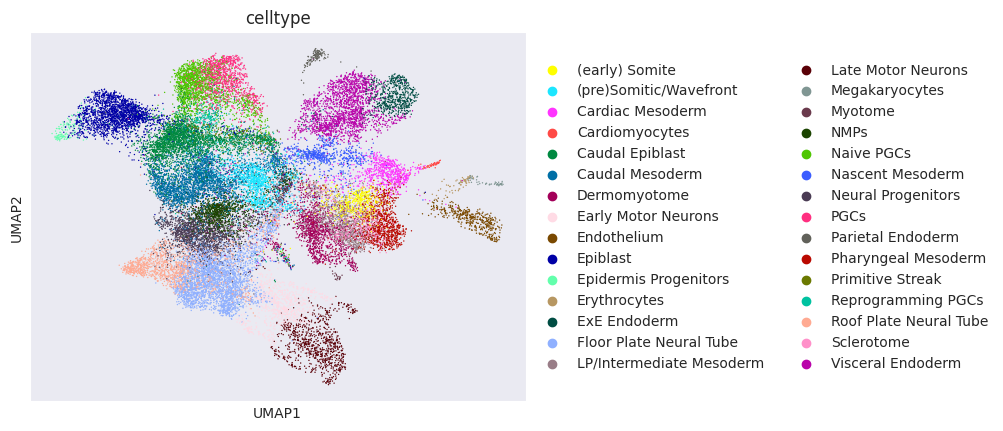

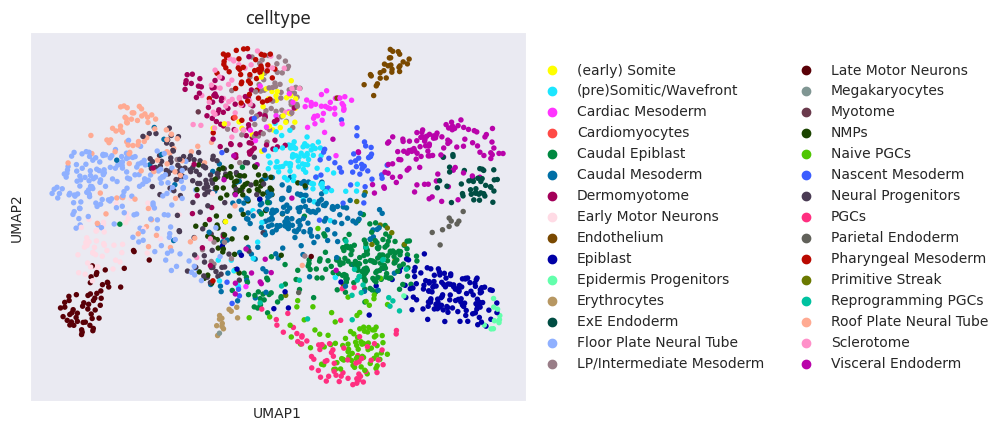

Average distance in copied dataset: 5.313914775848389
Average distance in original dataset: 6.825184396919098


In [22]:
#first select only the genes in raw counts that are present in norm&filtered set
#the current method with which the data is made
import random
random.seed(1)
cluster_data = pd.read_csv(os.path.join(os.path.join('../../../celloracle_data', 'clustering_data'), 'cluster_umap_data.tsv'), sep="\t", low_memory=False)
cluster_data.index = cluster_data['Cell_ID'].str.replace("::", ":")  # slight modification to cell IDs

# #reset to original, we are focussing on unspliced counts atm
# just_umap_set = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET.copy()
# just_umap_set.X = just_umap_set.layers['unspliced'].copy()
# just_umap_set.obs.index = just_umap_set.obs['obs_names']
# just_umap_set = add_umap_data(just_umap_set, cluster_data, add_bool = True)
# sc.pl.umap(just_umap_set, show=True, color='celltype')

RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_OG.copy()
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET.copy()
RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.obs.index = RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.obs['obs_names']
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.obs.index = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.obs['obs_names']
#print the duplicate
duplicate_mask = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.var["Symbol"].duplicated(keep='first')
#print number of duplicats
print("duplicates in var index: ", duplicate_mask.sum())
# Filter the AnnData object to keep only non-duplicated genes
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE[:, ~duplicate_mask].copy()
print("shape after: ", NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.shape)

temp = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.X.copy()
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.X = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers['unspliced'].copy()
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers["unspliced_spliced"] = temp
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers["raw_count"] = 2**NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers['unspliced'].toarray()
RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.X = RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers['unspliced'].copy()


#get the cells that result from prefiltering performed by vivek
RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = subset_genes(adata_raw=RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, adata_filtered=NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, subset_cells=False)

common_cells = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.obs_names
RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE[RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.obs_names.isin(common_cells)]
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers["raw_chich_counts"] = RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.layers['chic_counts'].copy()

#
# #prepocess the things by selecting the top 4k genes by pearson residuals, first normalizing the counts and storing it in a separate dataset
# #the resulting dataset has the normalized counts in the .X layer and the raw counts in the .layers['raw_count'] layer with 3000 genes (or whatever is indicated as value)
RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE= compute_pearson_res(RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, 3000)


#now subset the normalized set with those top 3000 genes currently present in raw count
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = subset_genes(adata_raw=NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, adata_filtered=RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, subset_cells=False)


NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE_OWN_UMAP = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.copy()
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE = add_umap_data(NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, cluster_data, add_bool = True)
NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE_OWN_UMAP = add_umap_data(NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE_OWN_UMAP, cluster_data, add_bool = False)



#downsample to 30K genes at random
selected_indices, discarded_indices = downsampleTo30CellsAtRandomAndRemoveMESCS(NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE)


train_v_umap = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE[selected_indices]
train_o_umap = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE_OWN_UMAP[selected_indices]

test_v_umap = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE[discarded_indices]
test_o_umap = NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE_OWN_UMAP[discarded_indices]

trim_train_v_umap = trim_dataset(train_v_umap)
trim_train_o_umap = trim_dataset(train_o_umap)
trim_test_v_umap = trim_dataset(test_v_umap)
trim_test_o_umap = trim_dataset(test_o_umap)

trim_train_v_umap.var.index = trim_train_v_umap.var["Symbol"]
trim_test_v_umap.var.index = trim_test_v_umap.var["Symbol"]
trim_train_o_umap.var.index = trim_train_o_umap.var["Symbol"]
trim_test_o_umap.var.index = trim_test_o_umap.var["Symbol"]


#make own umap
trim_train_o_umap = make_own_umap(trim_train_o_umap)
trim_test_o_umap = make_own_umap(trim_test_o_umap)



trim_train_o_umap.var.drop(columns=["Symbol"], inplace=True)
trim_test_o_umap.var.drop(columns=["Symbol"], inplace=True)
trim_train_v_umap.var.drop(columns=["Symbol"], inplace=True)
trim_test_v_umap.var.drop(columns=["Symbol"], inplace=True)


#
dir_path1 = os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_WO_MESC_test/own_umap")
dir_path2 = os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_WO_MESC_test/v_umap")
if not os.path.exists(dir_path1):
    os.makedirs(dir_path1)
if not os.path.exists(dir_path2):
    os.makedirs(dir_path2)
trim_train_o_umap.write_h5ad(os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_WO_MESC_test/own_umap", "train_data.h5ad"))
trim_test_o_umap.write_h5ad(os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_WO_MESC_test/own_umap", "test_data.h5ad"))
trim_train_v_umap.write_h5ad(os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_WO_MESC_test/v_umap", "train_data.h5ad"))
trim_test_v_umap.write_h5ad(os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_WO_MESC_test/v_umap", "test_data.h5ad"))

# make_own_umap(new_data_copy)
#so what we want to do, the new_data and new_data_copy have very likely 2 differnt umaps, i want to calculate the average distance between cells within both umaps and print thenm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt

# sc.pl.umap(new_data, show=True, color='celltype')


def calculate_average_distance(adata: sc.AnnData, umap_key: str) -> float:
    """
    Calculate the average distance between cells in the UMAP space.
    
    Parameters:
        adata (AnnData): The AnnData object containing UMAP coordinates.
        umap_key (str): The key for the UMAP coordinates in `obsm`.
    
    Returns:
        float: The average distance between cells in the UMAP space.
    """
    # Extract UMAP coordinates
    umap_coords = adata.obsm[umap_key]

    # Calculate pairwise distances
    distances = pairwise_distances(umap_coords)

    # Calculate average distance
    avg_distance = np.mean(distances)

    return avg_distance


# Calculate average distances for both datasets
umap_key = 'X_umap'
avg_distance_original = calculate_average_distance(trim_train_v_umap, umap_key)
avg_distance_copy = calculate_average_distance(trim_train_o_umap, umap_key)
print(f"Average distance in copied dataset: {avg_distance_copy}")
print(f"Average distance in original dataset: {avg_distance_original}")

In [18]:
anndata = sc.read_h5ad(os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_W_MESC/trimmed", "train_data.h5ad"))
#check if this has duplicate genes??
print(anndata.var.index.duplicated().sum())
print(anndata.var.index[anndata.var.index.duplicated(keep=False)])

0
Index([], dtype='object', name='Symbol')


/home/caspar/miniconda3/envs/gpu_cell_oracle/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [50]:
new_data = sc.read_h5ad(os.path.join("../../../celloracle_data/scrna_final_celloc/V_unspliced_norm_log_W_MESC/trimmed", "train_data.h5ad"))
print(new_data.obs["celltype"].unique())
for celltpye in new_data.obs["celltype"].unique():
    print(celltpye)
    
# new_data_copy = new_data.copy()
# print(new_data)
# #check if umap data is present, if so, remove umap data from obs and obsm and copy to new data
# if 'X_umap' in new_data.obsm:
#     new_data_copy.obsm.pop('X_umap')
#     new_data_copy.obs.pop('X_umap-0')
#     new_data_copy.obs.pop('X_umap-1')
#     # new_data_copy.uns.pop('umap')
# # new_data_copy = new_data.copy()
# print(new_data)
# #create_umap
# make_own_umap(new_data_copy)

['Floor Plate Neural Tube', 'Reprogramming PGCs', 'Caudal Mesoderm', 'Naive PGCs', 'Epiblast', ..., 'Parietal Endoderm', 'Epidermis Progenitors', 'Megakaryocytes', 'Cardiomyocytes', 'Myotome']
Length: 30
Categories (30, object): ['(early) Somite', '(pre)Somitic/Wavefront', 'Cardiac Mesoderm', 'Cardiomyocytes', ..., 'Reprogramming PGCs', 'Roof Plate Neural Tube', 'Sclerotome', 'Visceral Endoderm']
Floor Plate Neural Tube
Reprogramming PGCs
Caudal Mesoderm
Naive PGCs
Epiblast
NMPs
(pre)Somitic/Wavefront
Dermomyotome
PGCs
LP/Intermediate Mesoderm
Pharyngeal Mesoderm
Caudal Epiblast
Neural Progenitors
Late Motor Neurons
Cardiac Mesoderm
Early Motor Neurons
Roof Plate Neural Tube
Primitive Streak
Nascent Mesoderm
Visceral Endoderm
Endothelium
ExE Endoderm
Sclerotome
(early) Somite
Erythrocytes
Parietal Endoderm
Epidermis Progenitors
Megakaryocytes
Cardiomyocytes
Myotome


/home/caspar/miniconda3/envs/cellOracle/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


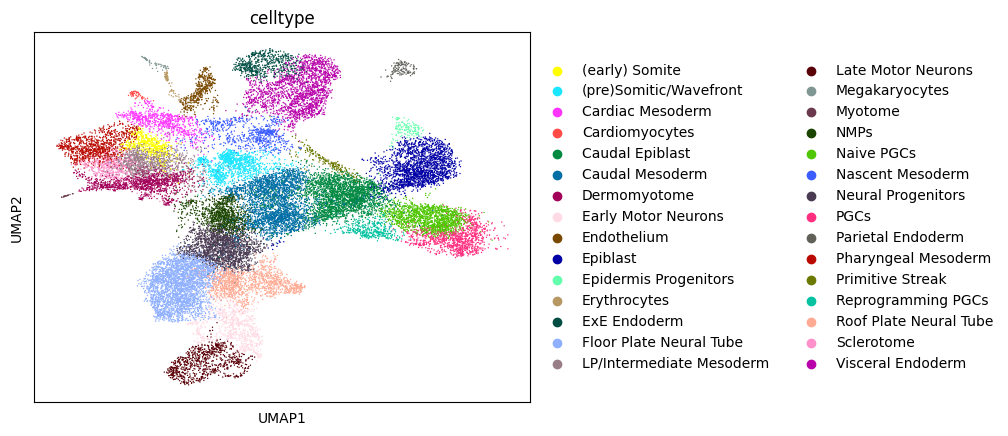

Average distance in original dataset: 6.825184396919098
Average distance in copied dataset: 6.294229507446289


In [38]:
#so what we want to do, the new_data and new_data_copy have very likely 2 differnt umaps, i want to calculate the average distance between cells within both umaps and print thenm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
sc.pl.umap(new_data, show=True, color='celltype')


def calculate_average_distance(adata: sc.AnnData, umap_key: str) -> float:
    """
    Calculate the average distance between cells in the UMAP space.
    
    Parameters:
        adata (AnnData): The AnnData object containing UMAP coordinates.
        umap_key (str): The key for the UMAP coordinates in `obsm`.
    
    Returns:
        float: The average distance between cells in the UMAP space.
    """
    # Extract UMAP coordinates
    umap_coords = adata.obsm[umap_key]
    
    # Calculate pairwise distances
    distances = pairwise_distances(umap_coords)
    
    # Calculate average distance
    avg_distance = np.mean(distances)
    
    return avg_distance

# Calculate average distances for both datasets
umap_key = 'X_umap'
avg_distance_original = calculate_average_distance(new_data, umap_key)
avg_distance_copy = calculate_average_distance(new_data_copy, umap_key)
print(f"Average distance in original dataset: {avg_distance_original}")
print(f"Average distance in copied dataset: {avg_distance_copy}")

In [35]:
print("final dataset train", final_dataset_train)
print("trim train", trim_train)
print("obs index", final_dataset_train.obs.index)
print("obs index", trim_train.obs.index)
print("var index", final_dataset_train.var.index)
print("var index", trim_train.var.index)
print("symbol column", final_dataset_train.var["Symbol"])


final dataset train AnnData object with n_obs × n_vars = 30000 × 3000
    obs: 'QC_peter', 'barcode_nla', 'barcode_vasa', 'batch_day_rep', 'bc_idx', 'colnames', 'coverage', 'day', 'day_rep', 'enrichment', 'exp_batch', 'mark', 'obs_names', 'plate_batch', 'plate_grp', 'rep', 'sample', 'seqrun', 'sizefactors_deconv_chic', 'sizefactors_deconv_spliced', 'sizefactors_deconv_unspliced', 'celltype', 'celltype_general'
    var: 'Biotype', 'Chromosome', 'Symbol', 'eff_gene_length', 'eff_tx_length', 'gene_maxlen', 'gene_meanlen', 'rownames', 'sum_amb_length', 'sum_exon_length', 'sum_intron_length', 'total_gene_length', 'tx_maxlen', 'tx_meanlen'
    uns: 'pca_neighbors_sparse', 'neighbors', 'umap', 'celltype_colors'
    obsm: 'colnames_factor', 'X_pca', 'pca_neighbors', 'X_umap'
    layers: 'chic', 'unspliced', 'raw_count', 'z_score'
    obsp: 'pca_neighbors_sparse', 'distances', 'connectivities'
trim train AnnData object with n_obs × n_vars = 30000 × 3000
    obs: 'bc_idx', 'colnames', 'obs_names

In [44]:
print(NORM_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE.X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40358963 stored elements and shape (35223, 3000)>
  Coords	Values
  (0, 2)	4.836615290611509
  (0, 3)	4.836615290611509
  (0, 11)	4.393089074187985
  (0, 13)	6.26944264089207
  (0, 19)	6.565887839015022
  (0, 22)	4.393089074187985
  (0, 23)	1.098548111807467
  (0, 24)	2.71558620757151
  (0, 25)	4.393089074187985
  (0, 28)	1.098548111807467
  (0, 31)	1.098548111807467
  (0, 35)	1.098548111807467
  (0, 41)	1.098548111807467
  (0, 42)	1.098548111807467
  (0, 43)	1.9797586796898545
  (0, 46)	9.723955590459786
  (0, 53)	1.098548111807467
  (0, 55)	3.3472764727377617
  (0, 56)	1.098548111807467
  (0, 61)	1.098548111807467
  (0, 64)	5.2400962448620865
  (0, 65)	1.9797586796898545
  (0, 66)	1.098548111807467
  (0, 71)	1.098548111807467
  (0, 72)	1.098548111807467
  :	:
  (35222, 2927)	0.8600141811824661
  (35222, 2929)	0.8600141811824661
  (35222, 2932)	8.927383284927348
  (35222, 2933)	0.8600141811824661
  (35222, 2939)	2.201757154

In [43]:
import scipy
#read the files in again to see if it worked
final_adata = sc.read_h5ad("../../celloracle_data/scrna_final_celloc/train_data.h5ad")
print(final_adata)
print("content")
print(final_adata.X)
for layer in final_adata.layers.keys():
    if scipy.sparse.issparse(final_adata.X):
        is_same = (final_adata.X != final_adata.layers[layer]).nnz == 0
    else:
        is_same = np.array_equal(final_adata.X, final_adata.layers[layer])
    print(f"Layer {layer} matches X:", is_same)


AnnData object with n_obs × n_vars = 30000 × 3000
    obs: 'QC_peter', 'barcode_nla', 'barcode_vasa', 'batch_day_rep', 'bc_idx', 'colnames', 'coverage', 'day', 'day_rep', 'enrichment', 'exp_batch', 'mark', 'obs_names', 'plate_batch', 'plate_grp', 'rep', 'sample', 'seqrun', 'sizefactors_deconv_chic', 'sizefactors_deconv_spliced', 'sizefactors_deconv_unspliced', 'celltype', 'celltype_general', 'lineage', 'X_umap-0', 'X_umap-1', 'n_counts_all'
    var: 'Biotype', 'Chromosome', 'Symbol', 'eff_gene_length', 'eff_tx_length', 'gene_maxlen', 'gene_meanlen', 'rownames', 'sum_amb_length', 'sum_exon_length', 'sum_intron_length', 'total_gene_length', 'tx_maxlen', 'tx_meanlen'
    obsm: 'X_umap', 'colnames_factor'
    layers: 'chic', 'norm_count', 'norm_log_count', 'raw_chic_counts', 'raw_count', 'unspliced'
content
<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 15769958 stored elements and shape (30000, 3000)>
  Coords	Values
  (0, 5)	2.9525249004364014
  (0, 7)	1.4762624502182007
 

In [91]:
# #compute pearson residuals
# HelperFuncs.reset_global_data()
# # HelperFuncs.print_info_about_anndata_frame(RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE)
# top_n_genes_filtered_raw_count = compute_pearson_res(RAW_COUNT_FOR_PEARSON_FILTER_SUBSET_EDITABLE, 4000)
# HelperFuncs.print_info_about_anndata_frame(top_n_genes_filtered_raw_count)
# #retrieve the list of the top n genes
# top_n_genes_list = retrieve_list_of_top_genes(top_n_genes_filtered_raw_count)
# #use these genes to subset again in the normalized and filtered dataset, save this as a new file as well



Global data reset
Shape of highly variable genes: (35223, 4000)
Main matrix (.X):
Type: <class 'anndata._core.views.SparseCSRView'>
Shape: (35223, 4000)
Data type: float32

Available layers:
['ambiguous', 'chic_counts', 'matrix', 'spliced', 'unspliced']

Size comparison:
Main matrix (.X) shape: (35223, 4000)
Layer 'ambiguous' shape: (35223, 4000)
Layer 'chic_counts' shape: (35223, 4000)
Layer 'matrix' shape: (35223, 4000)
Layer 'spliced' shape: (35223, 4000)
Layer 'unspliced' shape: (35223, 4000)


In [92]:
# pre_filtered_and_normalized = HelperFuncs.get_ann_data(DataType.FILTERED_AND_NORMALIZED)
# filtered_and_normalized_pearson = subset_genes(adata_raw=pre_filtered_and_normalized, adata_filtered=top_n_genes_filtered_raw_count, subset_cells=False)
# HelperFuncs.write_anndata_to_file(adata=filtered_and_normalized_pearson, file_name= 'pearson_filtered_genes.h5ad')


Original number of genes in raw data: 18311 original number of genes in filtered data: 4000
Number of cells in raw data: 35223 original number of cells in filtered data:  35223
Number of genes after subsetting: 4000 number of cells after subsetting: 35223
Removed 14311 genes and 0 cells
Anndata written to ../celloracle_data/pearson_filtered_genes.h5ad


In [93]:
# pearson_data = sc.read_h5ad('../celloracle_data/pearson_filtered_genes_normalized.h5ad')
# HelperFuncs.print_info_about_anndata_frame(pearson_data)

Main matrix (.X):
Type: <class 'scipy.sparse._csr.csr_matrix'>
Shape: (35223, 4000)
Data type: float32

Available layers:
['chic', 'unspliced']

Size comparison:
Main matrix (.X) shape: (35223, 4000)
Layer 'chic' shape: (35223, 4000)
Layer 'unspliced' shape: (35223, 4000)


In [97]:

# data = pd.read_csv('/home/vivek/NOBINFBACKUP/projects/mGast_tchic/metadata/mm10_unfiltered_genes_promoters.motifs.tsv', sep='\t')
# path = os.path.join(DATA_DIR, 'tf_target_gene_list.csv')
# data.to_csv(path, sep='\t', index=False)
